<a href="https://colab.research.google.com/github/yoo9519-AIdev/Kbit/blob/main/LSTM_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Kbit/bitcoin_predict/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv')
df = df.dropna(axis=0)
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4572252,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779
4572253,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396
4572254,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283
4572255,1600041540,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651


In [3]:
df['date'] = pd.to_datetime(df['Timestamp'], unit='s').dt.date
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01
...,...,...,...,...,...,...,...,...,...
4572252,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779,2020-09-13
4572253,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396,2020-09-13
4572254,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283,2020-09-13
4572255,1600041540,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651,2020-09-13


In [4]:
group = df.groupby('date')
Real_price = group['Weighted_Price'].mean()
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01
...,...,...,...,...,...,...,...,...,...
4572252,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779,2020-09-13
4572253,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396,2020-09-13
4572254,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283,2020-09-13
4572255,1600041540,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651,2020-09-13


In [5]:
prediction_days = 30
df_train = Real_price[len(Real_price) - prediction_days:]
df_test = Real_price[:len(Real_price) - prediction_days]

In [6]:
print(df_train)
df_train.shape, df_test.shape

date
2020-08-16    11850.765200
2020-08-17    12056.323421
2020-08-18    12164.403588
2020-08-19    11797.516511
2020-08-20    11799.526727
2020-08-21    11744.323115
2020-08-22    11559.842809
2020-08-23    11623.091878
2020-08-24    11733.966268
2020-08-25    11506.833402
2020-08-26    11405.160312
2020-08-27    11346.124717
2020-08-28    11442.939620
2020-08-29    11507.104338
2020-08-30    11609.048559
2020-08-31    11685.020311
2020-09-01    11874.642537
2020-09-02    11576.253069
2020-09-03    11039.063579
2020-09-04    10391.276090
2020-09-05    10268.003899
2020-09-06    10201.799719
2020-09-07    10159.821535
2020-09-08    10146.578533
2020-09-09    10188.169891
2020-09-10    10339.359896
2020-09-11    10303.242947
2020-09-12    10373.259995
2020-09-13    10393.662602
2020-09-14    10332.429402
Name: Weighted_Price, dtype: float64


((30,), (3148,))

In [7]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

training_set = sc.fit_transform(training_set)
x_train = training_set[0:len(training_set) - 1]
y_train = training_set[1:len(training_set)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [8]:
print(x_train.shape)
x_train.shape

(29, 1, 1)


(29, 1, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

regressor = Sequential()
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))
# regressor.add(LSTM(units=2, activation='relu', input_shape=(None, 1)))
# regressor.add(Dense(units=1, activation='sigmoid', input_shape=(None, 1)))

regressor.compile(optimizer='adam', loss='mean_squared_error') # mean_squred_error도 써보기

regressor.fit(x_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 6ms/step - loss: 0.1480
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1443
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1375
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1375
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1511
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1412
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1540
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1479
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1366
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.1402
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1508
Epoch 12/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1446
Epoch 13/100
2/2 [==============================] - 0s 5ms/st

In [10]:
test_set = df_test.values[1:]
sc = MinMaxScaler()

inputs = np.reshape(df_test.values[0:len(df_test) - 1], (len(test_set), 1))
inputs = sc.fit_transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

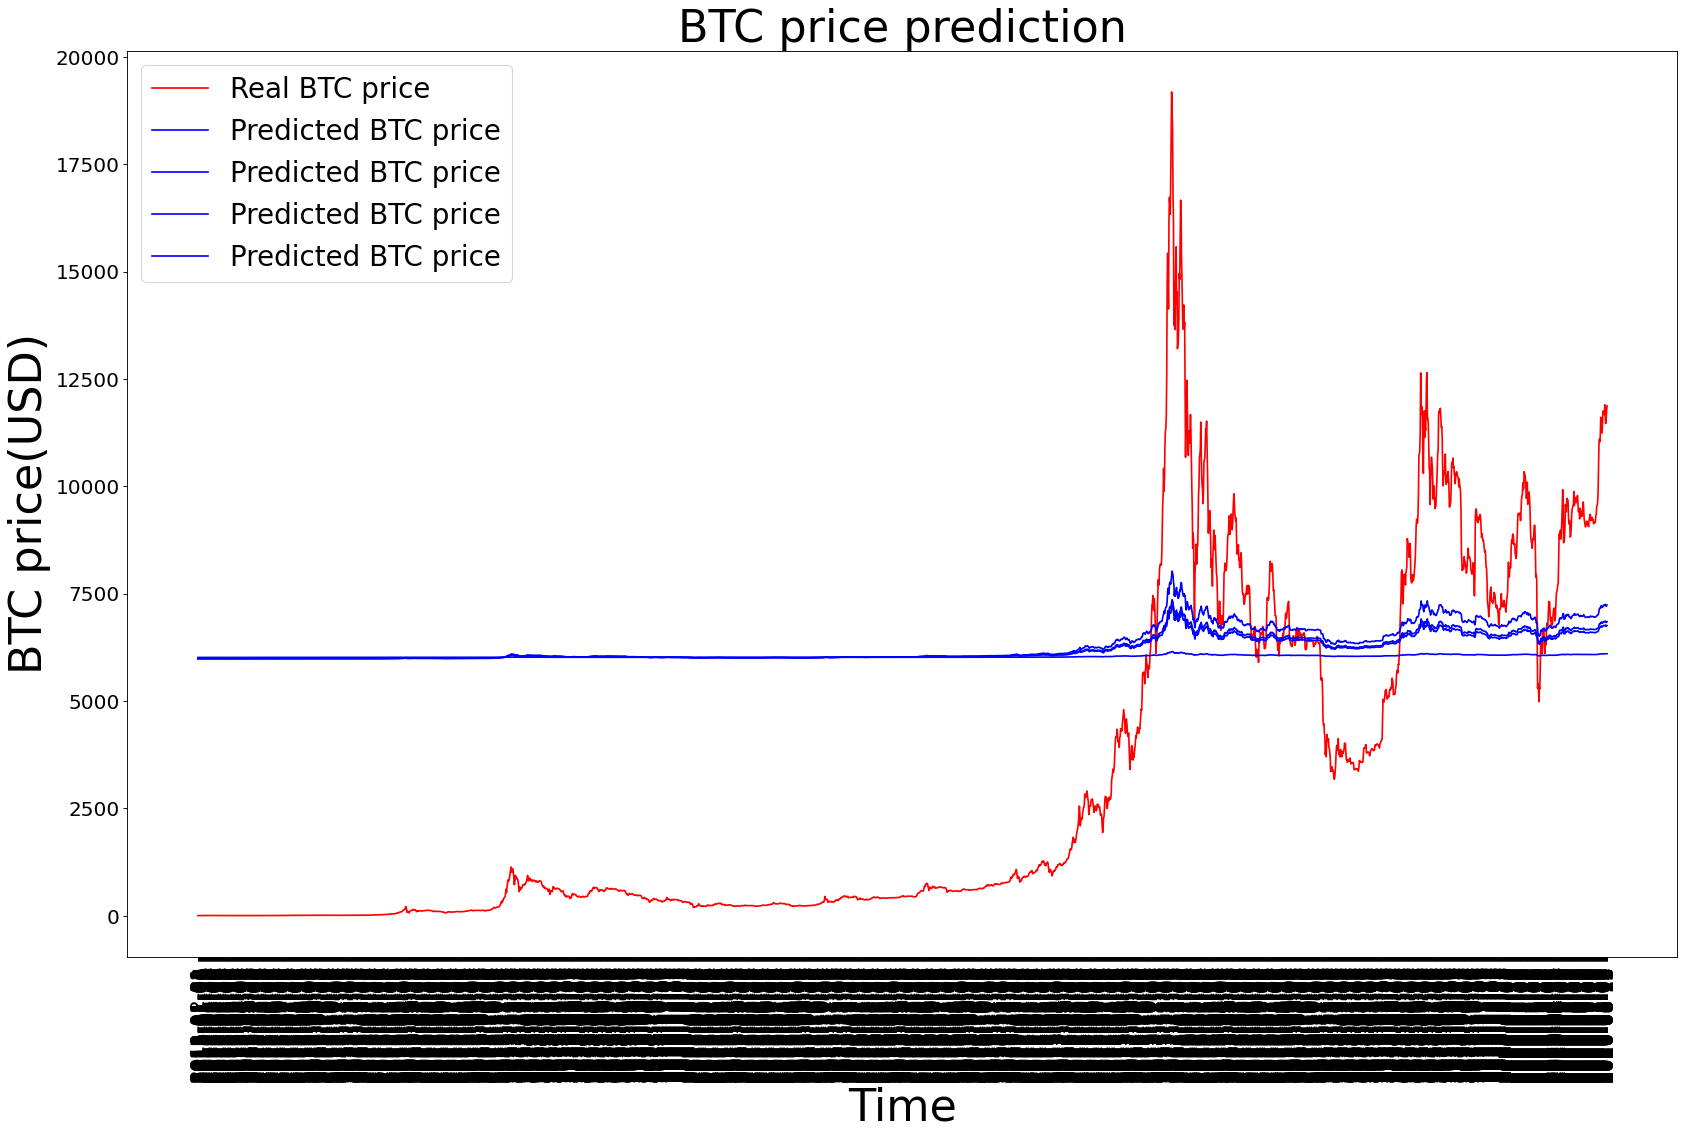

In [11]:
from tqdm.notebook import tqdm

plt.figure(figsize=(25, 15), dpi=80, facecolor='w', edgecolor='b')
ax = plt.gca()
plt.plot(test_set, color = 'red', label = 'Real BTC price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC price')
plt.title('BTC price prediction', fontsize=40)

df_test = df_test.reset_index()

x = df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')

for tick in tqdm(ax.xaxis.get_major_ticks()):
    tick.label1.set_fontsize(18)

for tick in tqdm(ax.yaxis.get_major_ticks()):
    tick.label1.set_fontsize(18)

plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size' : 25})

plt.show()

### Another Method

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings("ignore")

plt.style.use('seaborn-poster')

In [13]:
print(df.shape)
df.head()

(3330541, 9)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01
